In [1]:
# bootstraping; vasicek; pca

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import datetime

In [53]:
data = pd.read_excel('treasury_rates.xlsx').set_index('date')

In [61]:
df = data
df

,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
date,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23,4.69,4.65,4.73,4.82,4.70,4.21,3.88,3.61,3.56,3.52,3.80,3.69
2023-01-24,4.70,4.67,4.72,4.84,4.70,4.12,3.86,3.58,3.52,3.46,3.73,3.62
2023-01-25,4.67,4.65,4.72,4.79,4.67,4.11,3.84,3.54,3.51,3.46,3.74,3.62


<AxesSubplot: xlabel='date'>

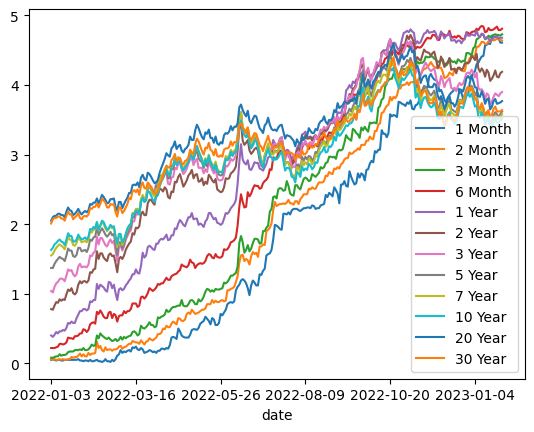

In [5]:
df.plot()

<AxesSubplot: >

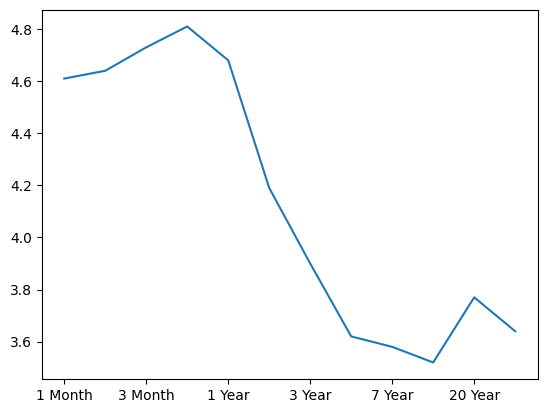

In [62]:
df.iloc[-1].plot()

In [57]:
from scipy import stats
_df = df.copy()
X = [i for i in range(len(_df.columns))]
print(X)
print(_df.iloc[-1].to_numpy())
slope, intercept, r_value, p_value, std_err = stats.linregress(X, _df.iloc[-1].to_numpy())
(slope, intercept)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[4.61 4.64 4.73 4.81 4.68 4.19 3.9  3.62 3.58 3.52 3.77 3.64]


(-0.12793706293706295, 4.84448717948718)

In [6]:
df.pct_change()

,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
date,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.200000,-0.166667,0.000000,0.000000,-0.050000,-0.012821,-0.019231,0.000000,0.012903,0.018405,0.024390,0.029851
2022-01-05,-0.166667,0.200000,0.125000,0.000000,0.078947,0.077922,0.078431,0.043796,0.031847,0.030120,0.009524,0.009662
2022-01-06,-0.200000,-0.166667,0.111111,0.045455,0.097561,0.060241,0.045455,0.027972,0.024691,0.011696,0.000000,0.000000
2022-01-07,0.250000,0.000000,0.000000,0.043478,-0.044444,-0.011364,0.017391,0.020408,0.018072,0.017341,0.014151,0.009569
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23,0.000000,0.002155,0.002119,0.004167,0.004274,0.016908,0.013055,0.014045,0.014245,0.011494,0.007958,0.008197
2023-01-24,0.002132,0.004301,-0.002114,0.004149,0.000000,-0.021378,-0.005155,-0.008310,-0.011236,-0.017045,-0.018421,-0.018970
2023-01-25,-0.006383,-0.004283,0.000000,-0.010331,-0.006383,-0.002427,-0.005181,-0.011173,-0.002841,0.000000,0.002681,0.000000


<AxesSubplot: xlabel='date'>

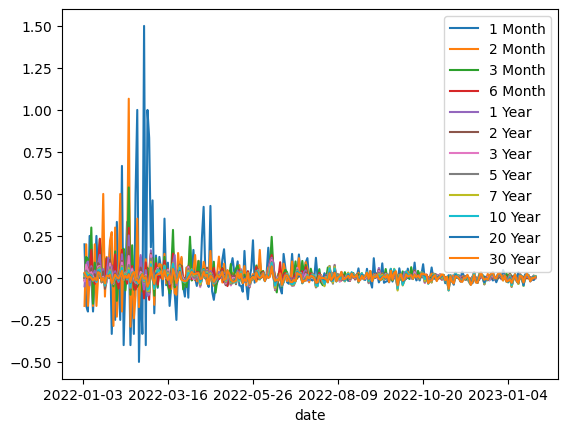

In [7]:
df.pct_change().plot()

In [8]:
df.corr()

,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
1 Month,1.000000,0.997207,0.994779,0.983325,0.965163,0.918009,0.880767,0.848346,0.843999,0.846015,0.853308,0.868490
2 Month,0.997207,1.000000,0.999105,0.992878,0.978786,0.937541,0.904493,0.874587,0.870332,0.871147,0.878196,0.890441
3 Month,0.994779,0.999105,1.000000,0.995480,0.983582,0.945972,0.915372,0.886419,0.881820,0.882148,0.889342,0.900478
6 Month,0.983325,0.992878,0.995480,1.000000,0.994223,0.965494,0.939936,0.913670,0.908478,0.906881,0.914941,0.920847
1 Year,0.965163,0.978786,0.983582,0.994223,1.000000,0.986754,0.968389,0.947105,0.941991,0.939574,0.943872,0.947054
2 Year,0.918009,0.937541,0.945972,0.965494,0.986754,1.000000,0.994849,0.982431,0.977436,0.973744,0.972450,0.971475
3 Year,0.880767,0.904493,0.915372,0.939936,0.968389,0.994849,1.000000,0.995013,0.990994,0.987022,0.983894,0.980472
5 Year,0.848346,0.874587,0.886419,0.913670,0.947105,0.982431,0.995013,1.000000,0.999051,0.996834,0.991258,0.987369
7 Year,0.843999,0.870332,0.881820,0.908478,0.941991,0.977436,0.990994,0.999051,1.000000,0.999093,0.992870,0.989898
10 Year,0.846015,0.871147,0.882148,0.906881,0.939574,0.973744,0.987022,0.996834,0.999093,1.000000,0.994211,0.993163


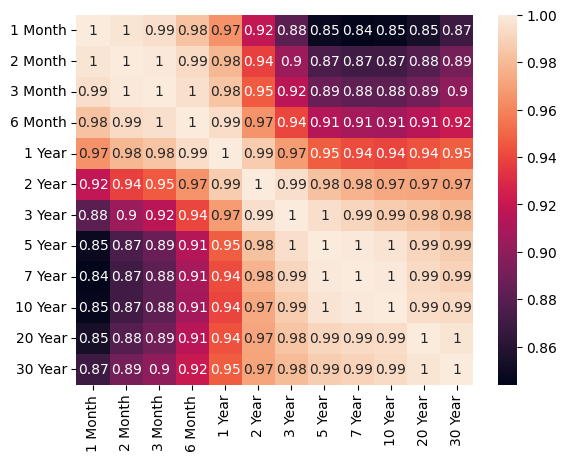

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Covariance of daily changes shows co-moves of different rates. Principal components can be calculated by finding the eigenvalues and eigenvectors of this covariance matrix of below.

In [10]:
df.cov()

,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
1 Month,2.439790,2.499097,2.505973,2.439805,2.149621,1.597856,1.341256,1.082377,0.990808,0.932141,0.893800,0.838296
2 Month,2.499097,2.574204,2.585272,2.530457,2.239204,1.676202,1.414819,1.146182,1.049488,0.985917,0.944868,0.882841
3 Month,2.505973,2.585272,2.601041,2.550281,2.261877,1.700068,1.439281,1.167729,1.068870,1.003557,0.961835,0.897434
6 Month,2.439805,2.530457,2.550281,2.523268,2.251905,1.709015,1.455640,1.185497,1.084595,1.016153,0.974614,0.903910
1 Year,2.149621,2.239204,2.261877,2.251905,2.033150,1.567862,1.346197,1.103094,1.009492,0.945025,0.902518,0.834479
2 Year,1.597856,1.676202,1.700068,1.709015,1.567862,1.241735,1.080801,0.894223,0.818604,0.765397,0.726674,0.668963
3 Year,1.341256,1.414819,1.439281,1.455640,1.346197,1.080801,0.950492,0.792378,0.726134,0.678779,0.643251,0.590698
5 Year,1.082377,1.146182,1.167729,1.185497,1.103094,0.894223,0.792378,0.667204,0.613322,0.574354,0.542968,0.498385
7 Year,0.990808,1.049488,1.068870,1.084595,1.009492,0.818604,0.726134,0.613322,0.564863,0.529669,0.500405,0.459746
10 Year,0.932141,0.985917,1.003557,1.016153,0.945025,0.765397,0.678779,0.574354,0.529669,0.497571,0.470288,0.432916


# PCA

Detrend the dataset by removing the mean of each column from our observations
Calculate the covariance/correlation matrix
Calculate the eigenvectors & eigenvalues which diagonalise the covariance/correlation matrix. We are wanting to solve 
V^-1 CV = D
Sort eigenvectors and eigenvalues based on decreasing eigenvalues (i.e. we take the eigenvalue contributing the most variance to out dataset as the first eigenvalue and so forth)


1. Parallel shifts in yield curve (shifts across the entire yield curve)
2. Changes in short/long rates (i.e. steepening/flattening of the curve)
3. Changes in curvature of the model (twists)

We see that the first 3 principal components account for almost all of the variance in the model, and thus we should just be able to use these three components to reconstruct our initial dataset and retain most of the characteristics of it.

In [18]:
import sklearn
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=3)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(df)
scdf = sc.transform(df)

pca.fit_transform(scdf)
None
# pca.fit(df)

s stated previously, principal component analysis performed on the interest rates changes is capable of detecting them, in the form of principal components. Usually[5], the first principal component records an almost parallel shift of the yield curve, the second one a change in the slope (tilt), and the third one a change located in the middle of the term structure (curvature or convexity). The first degree of intuition for this representation is provided by the figure below which illustrates the first three eigenvectors resulting from the singular value decomposition of the interest rates changes. In red, the first eigenvector is approximately a parallel line since it takes similar values across the entire spectrum of maturities. For this reason, it captures parallel movements of the yield curve. Subsequently, the eigenvector in green is almost increasing, hence it explains movements which are downward in nature on early maturities and upward on later ones. Ultimately, the third eigenvector in blue, is decreasing at the beginning and increasing at the end. Therefore, it describes inverted “bumps” of the yield curve (Alexander 2008a)[6].

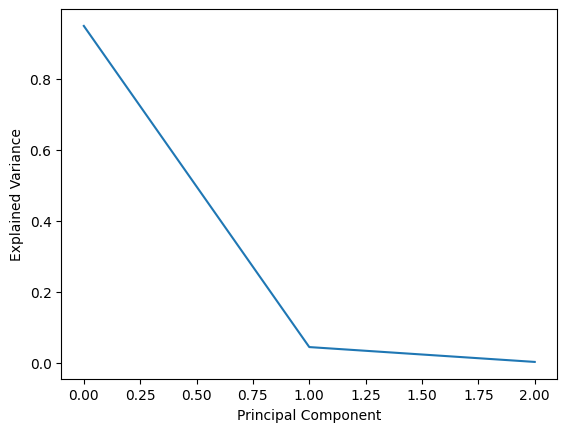

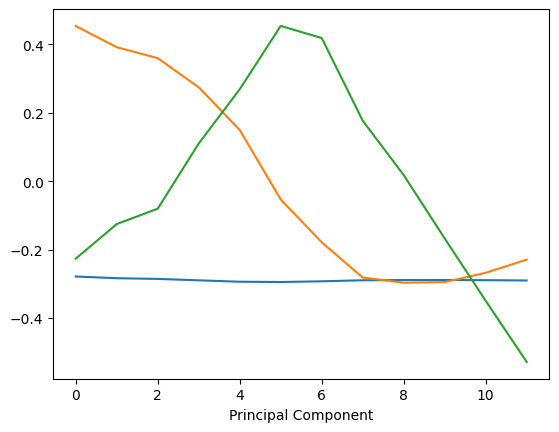

C:\Users\micha\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


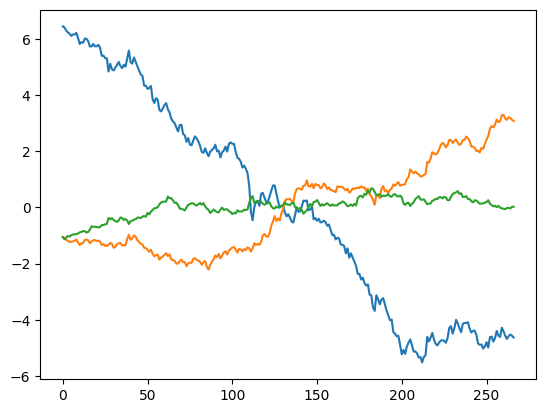

In [20]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Explained Variance")
plt.xlabel("Principal Component")
plt.show()

plt.plot(pca.components_[0:3].T)
plt.xlabel("Principal Component")
plt.show()

vals_t = pca.transform(df)
plt.plot(vals_t[:,0:3])
plt.show()

In [21]:
egv_loadings = pd.DataFrame(pca.components_.T, index = df.columns)
egv_loadings

,0,1,2
1 Month,-0.278439,0.453773,-0.226202
2 Month,-0.283417,0.392000,-0.125047
3 Month,-0.285453,0.360022,-0.080064
6 Month,-0.289591,0.274799,0.110460
1 Year,-0.293707,0.149982,0.269049
2 Year,-0.294545,-0.053132,0.454143
3 Year,-0.292442,-0.178293,0.418740
5 Year,-0.289458,-0.281450,0.177134
7 Year,-0.288797,-0.296565,0.018087
10 Year,-0.288636,-0.294769,-0.167124


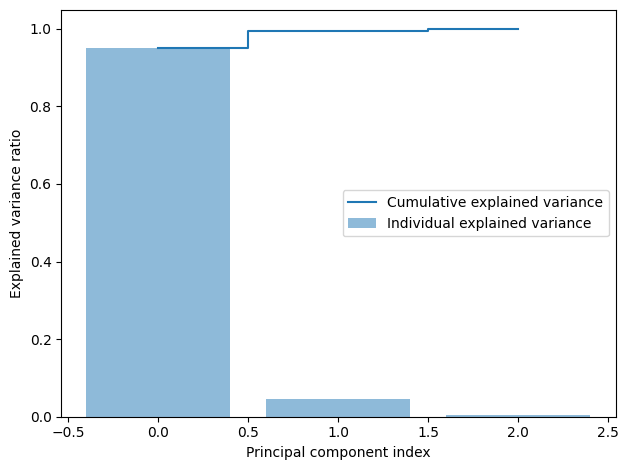

In [22]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Bootstraping

In [23]:
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols

#tenors
# t = np.array([0.0,0.5,0.75,1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0])
t = np.array([0.5,0.75,1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0])

#market rates
y = df.iloc[-1].to_numpy()

curve_fit1, status1 = calibrate_ns_ols(t,y) #NS model calibrate
curve_fit, status = calibrate_nss_ols(t,y) #NSS model calibrate
NS_ZC = NelsonSiegelCurve.zero(curve_fit1,t)
NS_Fwd = NelsonSiegelCurve.forward(curve_fit1,t)

NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,t)
NSS_Fwd = NelsonSiegelSvenssonCurve.forward(curve_fit,t)

In [24]:
NSS_ZC

array([2.74666736, 2.54849373, 2.46539395, 2.14892384, 1.75109819,
       1.12632867, 0.77884525, 0.60576106, 0.5251859 , 0.49089263,
       0.47888725, 0.47988922])

In [25]:
NSS_Fwd

array([ 1.85822966,  2.30383113,  2.04767862,  0.97957447,  0.21038742,
       -0.28858905, -0.19370956,  0.02282197,  0.21312098,  0.34804827,
        0.43479522,  0.51840218])

# Vasicek